In [ ]:
pip install nltk scikit-learn pandas


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Load the CSV file
file_path = "/content/English.csv"
df = pd.read_csv(file_path)
df['Commentary'] = df['Commentary'].astype(str)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download punkt_tab here

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('punkt_tab')
# Ensure 'commentary' column exists
if 'Commentary' not in df.columns:
    raise ValueError("The column 'Commentary' is not found in the CSV file.")

# Drop rows with missing commentary values
df = df.dropna(subset=['Commentary'])

# Tokenization
df['tokens'] = df['Commentary'].apply(lambda x: word_tokenize(str(x).lower()))
# Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
# Show tokenization and stemming results
print(df[['Commentary', 'tokens', 'stemmed']].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                          Commentary  \
0  Bhagavad-gītā is the widely read theistic scie...   
1  Dhṛtarāṣṭra was blind from birth. Unfortunatel...   
2  Duryodhana, a great diplomat, wanted to point ...   
3  Even though Dhṛṣṭadyumna was not a very import...   
4  Duryodhana mentions the exceptional heroes in ...   

                                              tokens  \
0  [bhagavad-gītā, is, the, widely, read, theisti...   
1  [dhṛtarāṣṭra, was, blind, from, birth, ., unfo...   
2  [duryodhana, ,, a, great, diplomat, ,, wanted,...   
3  [even, though, dhṛṣṭadyumna, was, not, a, very...   
4  [duryodhana, mentions, the, exceptional, heroe...   

                                             stemmed  
0  [bhagavad-gītā, is, the, wide, read, theistic,...  
1  [dhṛtarāṣṭra, wa, blind, from, birth, ., unfor...  
2  [duryodhana, ,, a, great, diplomat, ,, want, t...  
3  [even, though, dhṛṣṭadyumna, wa, not, a, veri,...  
4  [duryodhana, mention, the, except, hero, in, t..

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Convert lemmatized words back to sentence format for TF-IDF
df['lemmatized_text'] = df['lemmatized'].apply(lambda words: ' '.join(words))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

print("Lemmatization Results:\n", df[['Commentary', 'lemmatized']].head())

# Compute Cosine Similarity (pairwise)
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Display cosine similarity for first few records
print("\nCosine Similarity Matrix (first 5 records):\n", cosine_sim_matrix[:5, :5])

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Step 2: Named Entity Recognition (NER)
entities = []
for text in df['Commentary']:
    doc = nlp(text)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

In [ ]:
# Display sample entities
print("Named Entities Sample:")
print(entities[:10])


Named Entities Sample:
[('Gītā', 'PERSON'), ('Bhagavad', 'ORG'), ('Śrī Kṛṣṇa', 'PERSON'), ('Bhagavad', 'ORG'), ('Arjuna', 'PERSON'), ('Gītā', 'PERSON'), ('Bhagavad', 'ORG'), ('Vedic', 'PERSON'), ('One', 'CARDINAL'), ('Bhagavad', 'ORG')]


In [ ]:
# Step 3: Relation Extraction (basic pattern-based)
triplets = []
for text in df['Commentary']:
    doc = nlp(text)
    for sent in doc.sents:
        subject = ''
        obj = ''
        verb = ''
        for token in sent:
            if 'subj' in token.dep_:
                subject = token.text
            if 'obj' in token.dep_:
                obj = token.text
            if token.pos_ == 'VERB':
                verb = token.lemma_
        if subject and obj and verb:
            triplets.append((subject, verb, obj))




In [ ]:
# Display sample relations
print("\nExtracted Relations (Triplets):")
print(triplets[:10])



In [ ]:

# Load dataset
df = pd.read_csv('/content/English.csv')

In [ ]:
# Preprocess the text
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text.strip()

df['Commentary'] = df['Commentary'].astype(str).apply(preprocess_text)



In [ ]:
# Assign synthetic but imbalanced sentiment labels
np.random.seed(42)
sentiments = np.random.choice(["Positive", "Neutral", "Negative"], size=len(df), p=[0.5, 0.3, 0.2])
df['Sentiment'] = sentiments



In [ ]:
# Encode labels
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}
df['Label'] = df['Sentiment'].map(label_map)



In [ ]:
# Labels
labels = tf.keras.utils.to_categorical(df['Label'], num_classes=3)


In [ ]:
# ipython-input-16-ef174b12ebc9

# Before train-test split, add the following lines to tokenize and pad the text data:

# Assuming 'Commentary' is the column containing the text data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Create a Tokenizer instance and fit it on the text data
tokenizer = Tokenizer(num_words=5000)  # You can adjust num_words as needed
tokenizer.fit_on_texts(df['Commentary'])

# 2. Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(df['Commentary'])
max_length = 100  # Set a maximum sequence length, you can adjust this
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# 3. Now you can use 'padded' in train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [ ]:
# Build model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length), # Changed max_len to max_length
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.4552 - loss: 1.0829 - val_accuracy: 0.4583 - val_loss: 1.0778
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.4996 - loss: 1.0309 - val_accuracy: 0.4583 - val_loss: 1.0803
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.5289 - loss: 0.9730 - val_accuracy: 0.4083 - val_loss: 1.1807
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.6512 - loss: 0.7466 - val_accuracy: 0.2750 - val_loss: 1.4430
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.7293 - loss: 0.5347 - val_accuracy: 0.3167 - val_loss: 1.6530
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.8030 - loss: 0.4470 - val_accuracy: 0.3250 - val_loss: 1.5430
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.8936 - loss: 0.3065 - val_accuracy: 0.3500 - val_loss: 2.2303
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9127 - loss: 0.2576 - val_accuracy: 0.

In [ ]:
# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


In [ ]:
# Evaluation
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')



In [ ]:
# Print individual scores
print("== Evaluation on English Dataset ==")
print("Accuracy: ", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:   ", round(rec, 4))
print("F1 Score: ", round(f1, 4))

== Evaluation on English Dataset ==
Accuracy:  0.3583
Precision: 0.2835
Recall:    0.2928
F1 Score:  0.2864


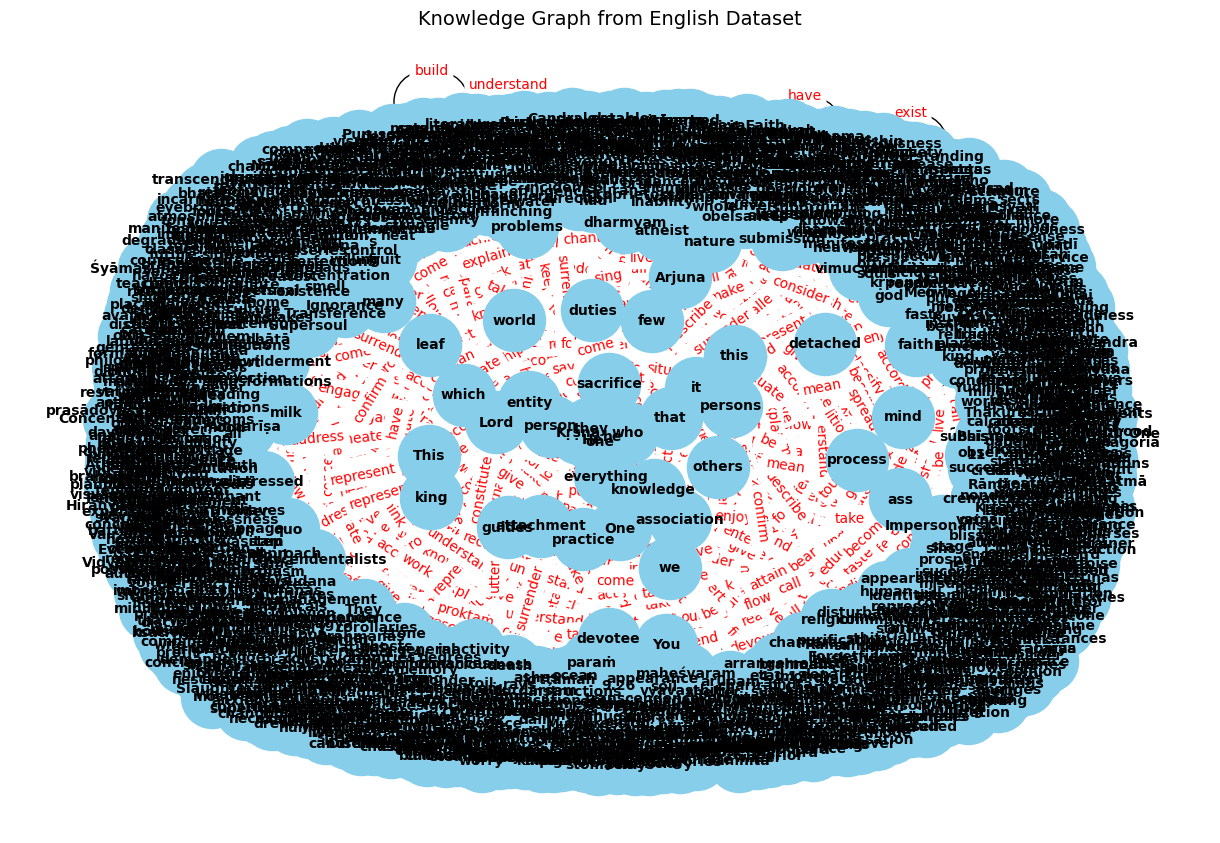

In [ ]:
# Step 4: Create a Knowledge Graph
G = nx.DiGraph()

for sub, pred, obj in triplets:
    G.add_edge(sub, obj, label=pred)

# Plot the Knowledge Graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Knowledge Graph from English Dataset", fontsize=14)
plt.show()

In [ ]:
# Limit to top 20 for visualization
triplets = list(triplets)[:20]

# Create the knowledge graph
G = nx.DiGraph()
for sub, pred, obj in triplets:
    G.add_edge(sub, obj, label=pred)

# Plot the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=1.2, iterations=100)  # more space between nodes
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue",
        font_size=9, font_weight="bold", arrows=True, edge_color="gray")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkred', font_size=8)
plt.title("Cleaner Knowledge Graph from English Dataset", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Define keywords for character filtering
character_keywords = ['krishna', 'arjun', 'karan', 'dronacharya']

triplets = set()

for text in df['Commentary']:
    doc = nlp(text)
    for sent in doc.sents:
        subject, obj, verb = '', '', ''
        for token in sent:
            if 'subj' in token.dep_:
                subject = token.text
            elif 'obj' in token.dep_:
                obj = token.text
            elif token.pos_ == 'VERB':
                verb = token.lemma_
        if subject and verb and obj:
            # Check if character-related term appears in subject or object (case-insensitive)
            lower_triplet = f"{subject.lower()} {obj.lower()}"
            if any(name in lower_triplet for name in character_keywords):
                triplets.add((subject.title(), verb, obj.title()))

# Check if triplets are found
if not triplets:
    print("No character-related relations found.")
else:
    print(f"Found {len(triplets)} relations.")

# Build and draw the graph
G = nx.DiGraph()
for sub, pred, obj in triplets:
    G.add_edge(sub, obj, label=pred)

plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=1.2, iterations=200)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue",
        font_size=10, font_weight="bold", edge_color="gray", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkgreen', font_size=9)
plt.title("Character-wise Knowledge Graph", fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
from collections import defaultdict
import pandas as pd

# Prepare a mapping: Character → List of (Subject, Verb, Object)
char_rels = defaultdict(list)
for subj, verb, obj in triplets:
    key_text = f"{subj.lower()} {obj.lower()}"
    for name in character_keywords:
        if name in key_text:
            # Associate this triple with that character
            char_rels[name.title()].append((subj, verb, obj))

# Flatten into a DataFrame for easy viewing
rows = []
for character, rels in char_rels.items():
    for subj, verb, obj in rels:
        rows.append({
            "Character": character,
            "Subject":   subj,
            "Verb":      verb,
            "Object":    obj
        })
df_char = pd.DataFrame(rows, columns=["Character","Subject","Verb","Object"])

# Display
print(df_char)

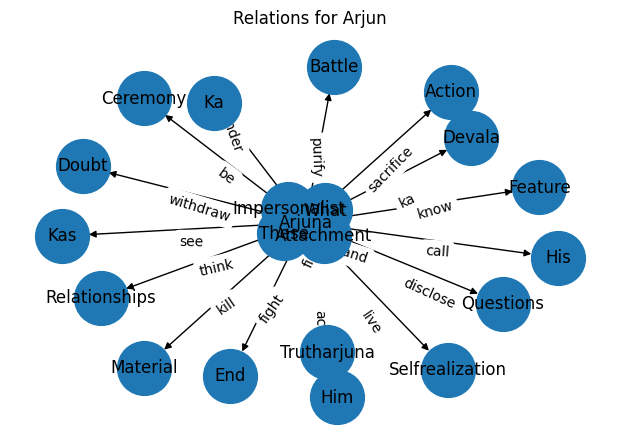

In [ ]:
for character, rels in char_rels.items():
    Gc = nx.DiGraph()
    for s,v,o in rels:
        Gc.add_edge(s, o, label=v)
    plt.figure(figsize=(6,4))
    nx.draw(Gc, with_labels=True, node_size=1500)
    nx.draw_networkx_edge_labels(Gc,
        pos=nx.spring_layout(Gc),
        edge_labels=nx.get_edge_attributes(Gc,'label'))
    plt.title(f"Relations for {character}")
    plt.show()


In [ ]:
from collections import defaultdict
import pandas as pd

# 1. Group triplets by character
char_rels = defaultdict(list)
for subj, verb, obj in triplets:
    combo = f"{subj.lower()} {obj.lower()}"
    for name in character_keywords:
        if name in combo:
            char_rels[name.title()].append((subj, verb, obj))

# 2. Turn into a DataFrame
rows = []
for character, rels in char_rels.items():
    for subj, verb, obj in rels:
        rows.append({
            "Character": character,
            "Subject":   subj,
            "Verb":      verb,
            "Object":    obj
        })
df_char = pd.DataFrame(rows, columns=["Character","Subject","Verb","Object"])

# 3. Display per character
for name in ['Krishna', 'Arjun', 'Karan', 'Dronacharya']:
    print(f"\n=== Relations for {name} ===")
    sub_df = df_char[df_char['Character'] == name]
    if sub_df.empty:
        print("  (none found)")
    else:
        print(sub_df.to_string(index=False))



=== Relations for Krishna ===
  (none found)

=== Relations for Arjun ===
Character       Subject       Verb          Object
    Arjun        Arjuna        act              Ka
    Arjun        Arjuna       kill           Doubt
    Arjun        Arjuna      think             His
    Arjun        Arjuna         be   Relationships
    Arjun        Arjuna       call        Ceremony
    Arjun    Attachment      fight          Arjuna
    Arjun        Arjuna         ka       Questions
    Arjun        Arjuna       know Selfrealization
    Arjun        Arjuna     purify          Action
    Arjun        Arjuna   withdraw          Battle
    Arjun        Arjuna   disclose             Kas
    Arjun        Arjuna       live          Devala
    Arjun        Arjuna      fight             End
    Arjun         These         ka          Arjuna
    Arjun Impersonalist understand          Arjuna
    Arjun        Arjuna  sacrifice        Material
    Arjun          What         go          Arjuna
    Arj

Twitter_Dataset


In [ ]:
pip install nltk pandas


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure required NLTK resources are downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [ ]:
# Load Twitter and English datasets
twitter_df = pd.read_csv('/content/Twitter_Data.csv')
english_df = pd.read_csv('/content/English.csv')




In [ ]:
# Download VADER if not already downloaded
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text.strip()
english_df['Commentary'] = english_df['Commentary'].astype(str).apply(preprocess_text)

In [ ]:
# Clean text
twitter_df['clean_text'] = twitter_df['clean_text'].astype(str).apply(preprocess_text)
english_df['Commentary'] = english_df['Commentary'].astype(str).apply(preprocess_text)


In [ ]:
# Tokenizer from Twitter
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(twitter_df['clean_text'])

In [ ]:
# Tokenize and pad Twitter data
twitter_sequences = tokenizer.texts_to_sequences(twitter_df['clean_text'])
max_length = max(len(seq) for seq in twitter_sequences)
twitter_padded = pad_sequences(twitter_sequences, maxlen=max_length, padding='post')


In [ ]:
# Sentiment label mapping
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
twitter_labels = twitter_df['category'].map(label_mapping)

# ✨ CHANGED: Handle NaN values by filling with a valid category or removing them
# Option 1: Fill NaN values with a specific category (e.g., 'Neutral')
twitter_labels = twitter_labels.fillna(label_mapping["Neutral"])  # Replace NaN with 1 (Neutral)

# Option 2: Remove rows with NaN values
# twitter_df = twitter_df.dropna(subset=['category'])  # Remove rows with NaN in 'category'
# twitter_labels = twitter_df['category'].map(label_mapping)  # Recalculate labels

twitter_labels_cat = to_categorical(twitter_labels, num_classes=3)

In [ ]:
# Build LSTM model
embedding_dim = 100
lstm_units = 128
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_length),
    LSTM(lstm_units, return_sequences=True),
    Dropout(0.3),
    LSTM(lstm_units),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train on Twitter data
print("Training on Twitter dataset...")
model.fit(twitter_padded, twitter_labels_cat, epochs=10, batch_size=64, validation_split=0.1)


Training on Twitter dataset...
Epoch 1/10
2213/2292 ━━━━━━━━━━━━━━━━━━━━ 27s 352ms/step - accuracy: 0.9963 - loss: 0.0126